# Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Customers 

In [24]:
# load customer table
df_c=pd.read_csv(r"C:\Users\vivsk\Data Spark Project\Customers.csv",encoding='ISO-8859-1')
df_c

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [25]:
# Convert the 'Birthday' column from string format (month/day/year) to datetime objects.
# Using errors='coerce' ensures that any value not matching the format is set to NaT (Not a Time).
# The '.dt.date' extracts just the date part, removing any time component.
df_c['Birthday'] = pd.to_datetime(df_c['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date 
df_c

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [30]:
# Print a summary of the DataFrame, including counts, types, and memory usage.
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [28]:
# check missing values
df_c.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [31]:
# Remove 'State Code' and 'Zip Code' columns from df_c.
df_c.drop(["State Code", "Zip Code"], axis=1, inplace=True)

In [32]:
df_c

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,Texas,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,Virginia,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,North Carolina,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,California,United States,North America,1937-10-12


In [33]:
df_c.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State          0
Country        0
Continent      0
Birthday       0
dtype: int64

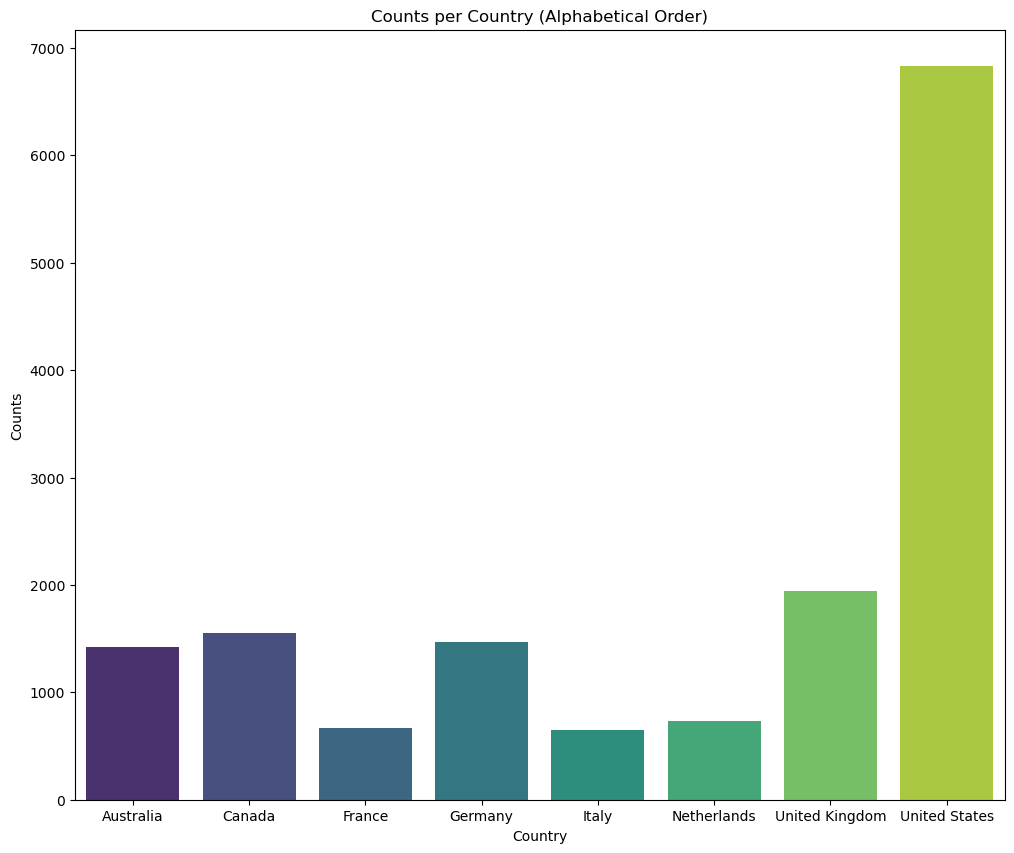

In [66]:
# Plot country counts in alphabetical order
plt.figure(figsize=(12, 10))
sns.countplot(x="Country", data=df_c, 
              order=sorted(df_c["Country"].unique()), palette="viridis")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts per Country (Alphabetical Order)")
plt.show()


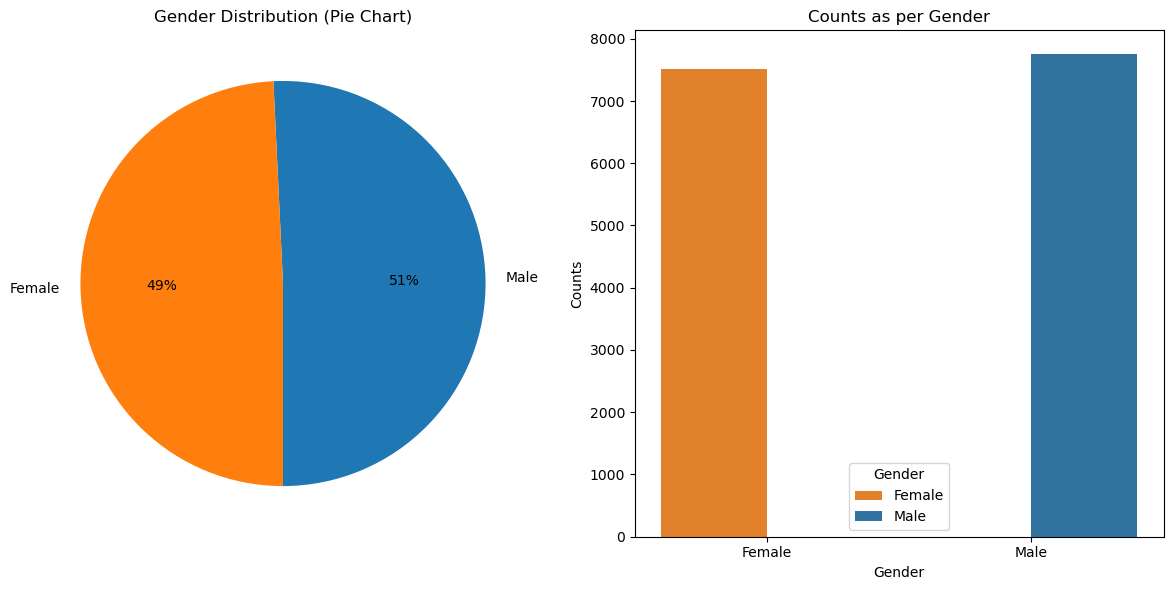

In [76]:
# Define a color mapping for genders.
color_map = {'Male': '#1f77b3',  # Blue
             'Female': '#ff7f0e'}  # Orange

# Pie Chart with custom colors
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
gender_counts = df_c["Gender"].value_counts()
plt.pie(gender_counts, 
        autopct='%1.0f%%', 
        labels=gender_counts.index,
        startangle=270, 
        colors=[color_map[gender] for gender in gender_counts.index])
plt.title("Gender Distribution (Pie Chart)")

# Count Plot with the same custom colors
plt.subplot(1,2,2)
sns.countplot(x="Gender", data=df_c, hue="Gender", palette=color_map)
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Counts as per Gender")

plt.tight_layout()
plt.show()

# Exchange Rates

In [78]:
# load customer table
df_ex=pd.read_csv(r"C:\Users\vivsk\Data Spark Project\Exchange_Rates.csv",encoding='ISO-8859-1')
df_ex

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [166]:
# Rename the column in df_ex if it is actually 'Currency Code'
df_ex.rename(columns={'Currency Code': 'Currency_Code'}, inplace=True)
data = df_ex[['Date', 'Currency_Code', 'Exchange']].values.tolist()

In [167]:
#check data types
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           11215 non-null  datetime64[ns]
 1   Currency_Code  11215 non-null  object        
 2   Exchange       11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [168]:
# check missing values
df_ex.isnull().sum()

Date             0
Currency_Code    0
Exchange         0
dtype: int64

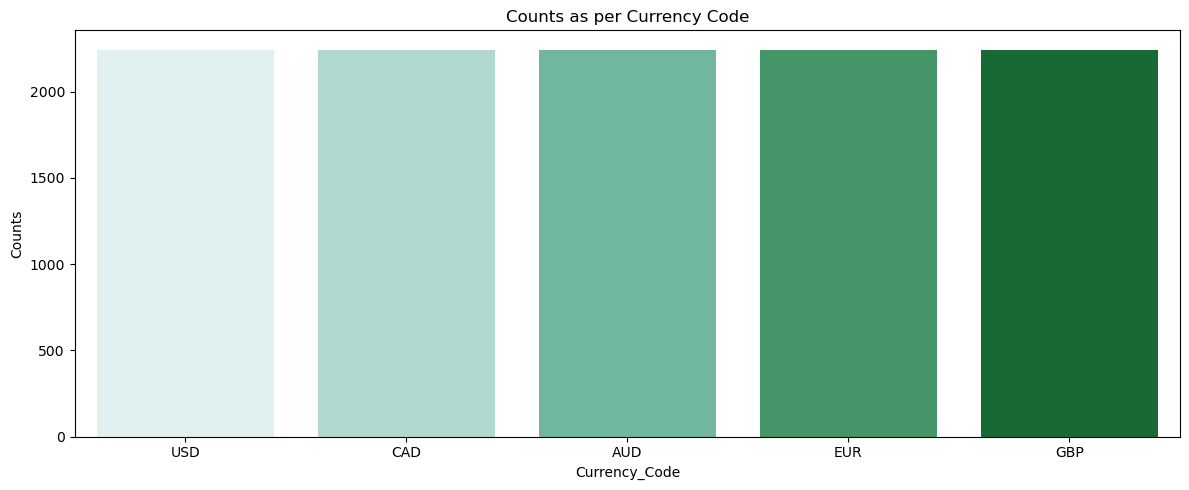

In [170]:
# Visualize currency counts with improved settings.
plt.figure(figsize=(12,5))
sns.countplot(x="Currency_Code", data=df_ex, palette="BuGn")
plt.xlabel("Currency_Code")
plt.ylabel("Counts")
plt.title("Counts as per Currency Code")
plt.tight_layout()       # Adjust layout to prevent clipping.

plt.show()


# Products

In [100]:
df_p=pd.read_csv(r"C:\Users\vivsk\Data Spark Project\Products.csv",encoding='ISO-8859-1')
df_p

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [101]:
#check data types
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [102]:
# check missing values
df_p.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [108]:
df_p["Unit Cost USD"] = df_p["Unit Cost USD"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False)
df_p["Unit Cost USD"] = df_p["Unit Cost USD"].astype(float)

df_p["Unit Price USD"] = df_p["Unit Price USD"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False)
df_p["Unit Price USD"] = df_p["Unit Price USD"].astype(float)


In [109]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [ ]:
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].astype(float)

df_products["Unit Price USD"] = df_products["Unit Price USD"].str.replace("$", "").str.replace(",", "")
df_products["Unit Price USD"] = df_products["Unit Price USD"].astype(float)

In [112]:
# drop the column
df_p.drop(["SubcategoryKey"],axis=1,inplace=True)

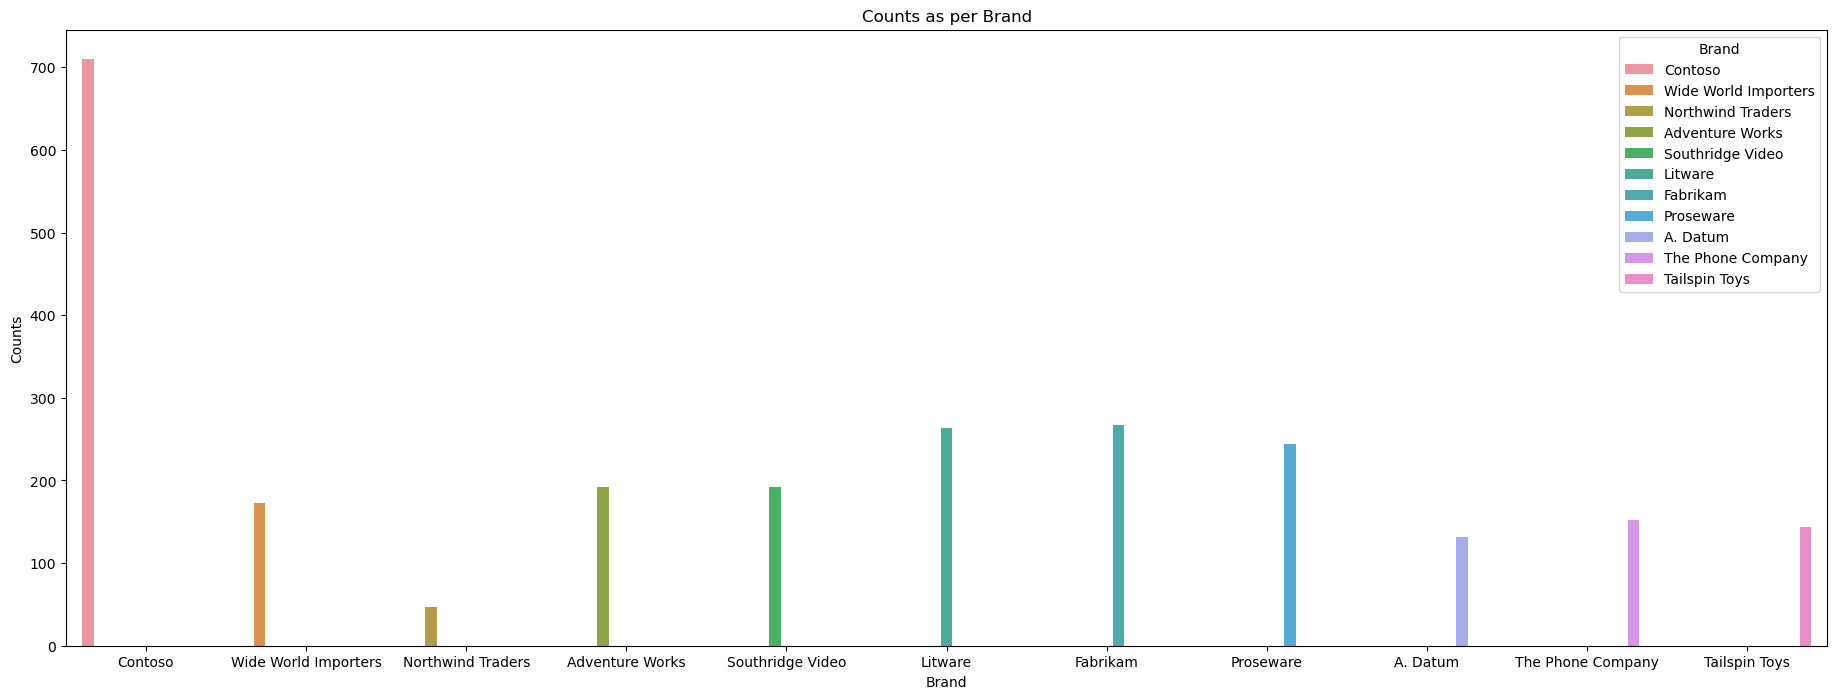

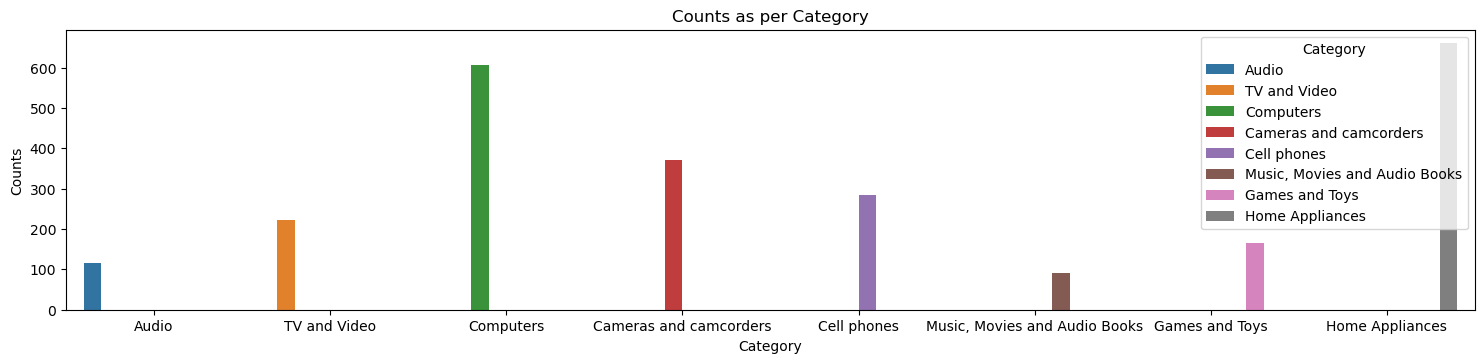

In [113]:
#visualize the brand and category
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=df_p["Brand"],data=df_p,hue="Brand")
plt.xlabel("Brand")
plt.ylabel("Counts")
plt.title("Counts as per Brand")
plt.show()
plt.figure(figsize=(40,8))
plt.subplot(2,2,2)
sns.countplot(x=df_p["Category"],data=df_p,hue="Category")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Counts as per Category")
plt.show()

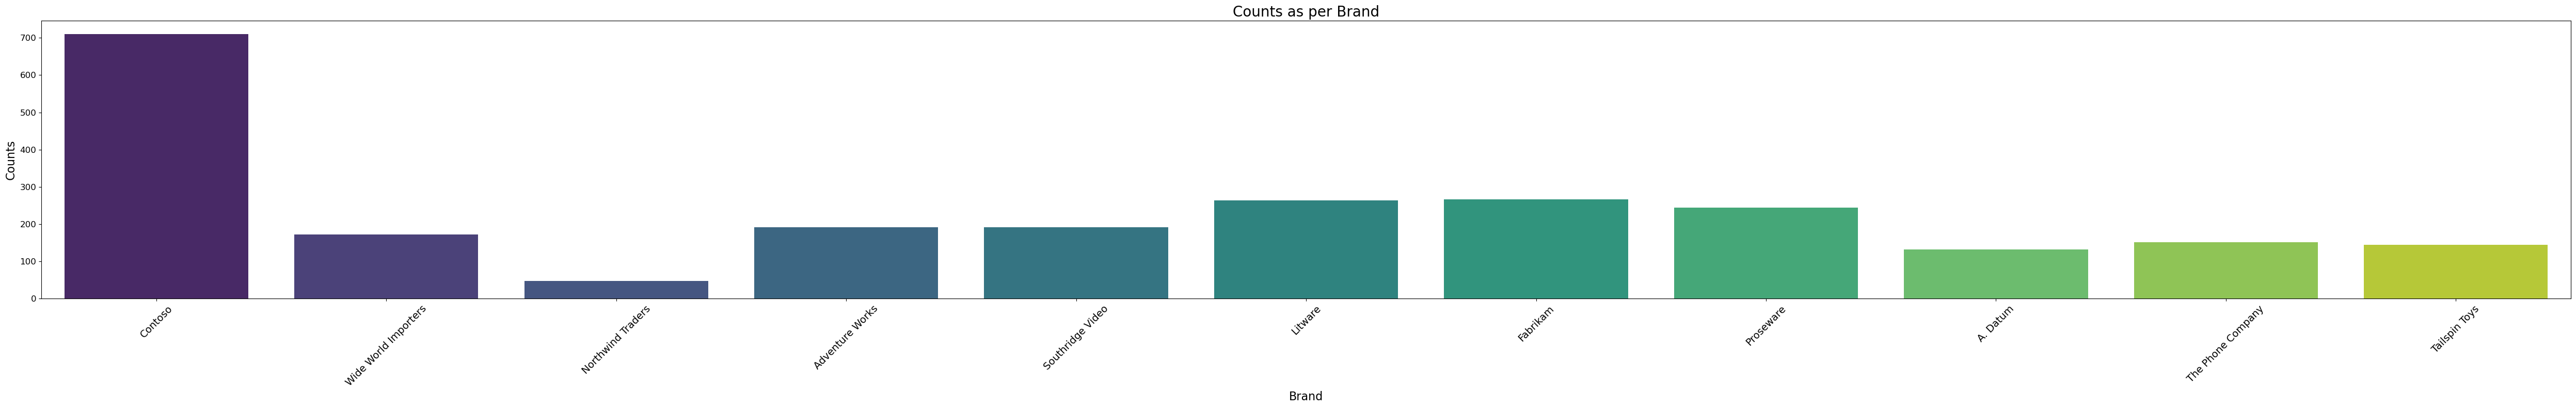

In [120]:
# Visualize Brand Counts
plt.figure(figsize=(50,8))
sns.countplot(x="Brand", data=df_p, palette="viridis")
plt.xlabel("Brand", fontsize=16)
plt.ylabel("Counts", fontsize=16)
plt.title("Counts as per Brand", fontsize=20)
plt.xticks(rotation=45, fontsize=14)  # Increase x-axis tick label size and rotate if needed
plt.yticks(fontsize=12)               # Increase y-axis tick label size
plt.tight_layout()
plt.show()


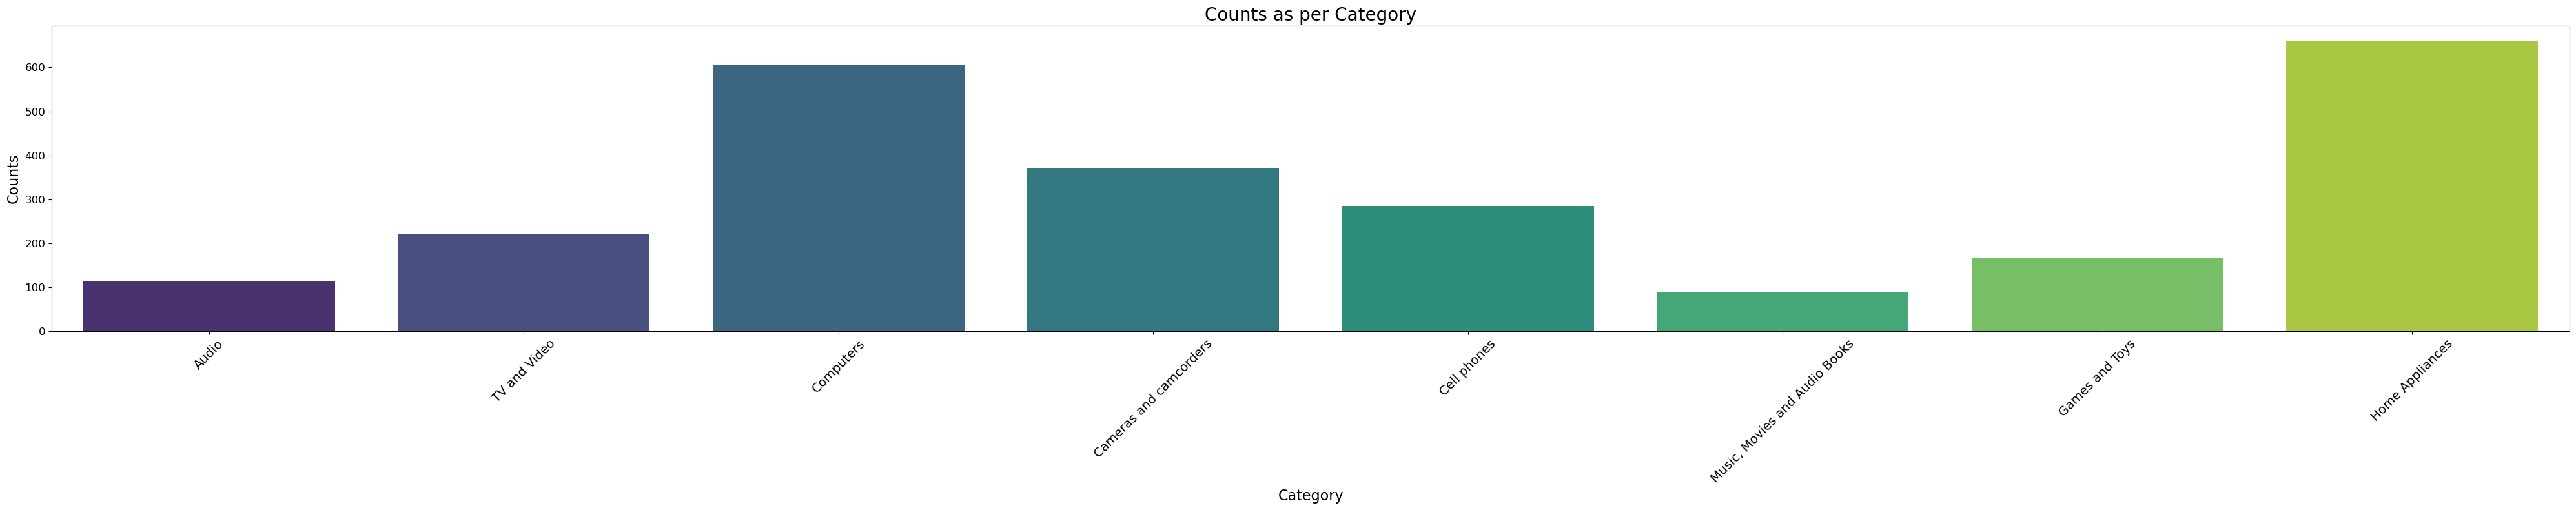

In [122]:
# Visualize Category Counts
plt.figure(figsize=(40,8))
sns.countplot(x="Category", data=df_p, palette="viridis")
plt.xlabel("Category", fontsize=16)
plt.ylabel("Counts", fontsize=16)
plt.title("Counts as per Category", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Sales

In [123]:
#load sales details
df_sales=pd.read_csv(r"C:\Users\vivsk\Data Spark Project\Sales.csv",encoding='ISO-8859-1')
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [124]:
#check data types
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [125]:
# check missing values
df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [126]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [127]:
# fill the missing values
df_sales["Delivery Date"]=df_sales["Delivery Date"].fillna(0)

In [128]:
df_sales.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

# Stores

In [129]:
#load sales details
df_stores=pd.read_csv(r"C:\Users\vivsk\Data Spark Project\Stores.csv",encoding='ISO-8859-1')
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [132]:
#check data types
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [133]:
# check missing values
df_stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [134]:
df_stores.fillna(0)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [136]:
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [137]:
# replacing the nan value
df_stores = df_stores.replace({np.nan: None})

# Create the sql database

In [142]:
# Connect to MySQL and create the 'Dataspark' database if it doesn't exist

import mysql.connector

# Establish connection to the MySQL server
connection = mysql.connector.connect(
    host='localhost',     # Local server
    user='root',          # MySQL username
    password='vivek'      # MySQL password
)

# Create a cursor to execute SQL queries
cursor = connection.cursor()

# Check if the 'Dataspark' database already exists
cursor.execute("SHOW DATABASES LIKE 'Dataspark'")
exists = cursor.fetchone()

# If the database doesn't exist, create it
if not exists:
    cursor.execute("CREATE DATABASE Dataspark")
    print("Database 'Dataspark' created.")
else:
    print("Database 'Dataspark' already exists.")

# Close the cursor and the connection
cursor.close()
connection.close()


Database 'Dataspark' already exists.


In [147]:
# First, ensure you have an active connection to your MySQL database.
import mysql.connector

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='vivek',
    database='Dataspark'
)

# Create a new cursor from the active connection.
cursor = connection.cursor()

# Create the customer_details table if it doesn't already exist.
cursor.execute('''
    CREATE TABLE IF NOT EXISTS customer_details(
        CustomerKey INT,
        Gender VARCHAR(255),
        Name VARCHAR(255),
        City VARCHAR(255),
        State VARCHAR(255),
        Country VARCHAR(255),
        Continent VARCHAR(255),
        Birthday VARCHAR(255)
    )
''')
print("Table Created successfully")

# Commit the changes and close the connection
connection.commit()
cursor.close()
connection.close()


Table Created successfully


In [156]:
# Select only the columns that match the customer_details table
cols = ['CustomerKey', 'Gender', 'Name', 'City', 'State', 'Country', 'Continent', 'Birthday']
data = df_c[cols].values.tolist()

insert_query = '''
INSERT INTO customer_details(
    CustomerKey,
    Gender,
    Name,
    City,
    State,
    Country,
    Continent,
    Birthday
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
'''
cursor.executemany(insert_query, data)
connection.commit()
print("Inserted successfully")


Inserted successfully


In [165]:
# exchange table creation
cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_details(
                  Date VARCHAR(255),
                  Currency_Code VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [173]:
# Convert the 'Date' column in df_ex to a string format (YYYY-MM-DD) so that MySQL can accept it.
df_ex['Date'] = df_ex['Date'].apply(lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else None)

# Create a new cursor for the insert operation.
cursor = connection.cursor()

# Define the INSERT query for the exchange_details table.
# Note: If a column name has a space (e.g., "Currency Code"), enclose it in backticks.
insert_query = '''INSERT INTO exchange_details(
                    `Date`,
                    Currency_Code,
                    Exchange
                  )
                  VALUES (%s, %s, %s)'''

# Select only the columns that match the table schema.
# Ensure that the column names used here match your DataFrame's columns.
data = df_ex[['Date', 'Currency_Code', 'Exchange']].values.tolist()

# Execute the insert operation for all rows.
cursor.executemany(insert_query, data)
connection.commit()  # Commit the transaction

print("Inserted successfully")

# Close the cursor after the operation.
cursor.close()


Inserted successfully


True

In [176]:
# Create a new cursor from the active connection
cursor = connection.cursor()

# Create the product_details table if it doesn't already exist.
cursor.execute('''
    CREATE TABLE IF NOT EXISTS product_details(
        ProductKey INT,
        Product_Name VARCHAR(255),
        Brand VARCHAR(255),
        Color VARCHAR(255),
        Unit_Cost_USD FLOAT,
        Unit_Price_USD FLOAT,
        Subcategory VARCHAR(255),
        CategoryKey VARCHAR(255),
        Category VARCHAR(255)
    )
''')

# Commit the changes if needed
connection.commit()

print("Table Created successfully")

# Close the cursor after the operation.
cursor.close()


Table Created successfully


True

In [178]:
# Create a new cursor from the active connection for the insert operation.
cursor = connection.cursor()

# Define the INSERT query for the product_details table.
insert_query = '''INSERT INTO product_details(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'''

data = df_p[['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'Subcategory', 'CategoryKey', 'Category']].values.tolist()

# Execute the insert query for all rows.
cursor.executemany(insert_query, data)
connection.commit()  # Commit the transaction

print("Inserted successfully")

# Close the cursor after the operation.
cursor.close()


Inserted successfully


True

In [180]:
# Create a new cursor from the active connection for the insert operation.

cursor = connection.cursor()



#sales table creation
cursor.execute('''CREATE TABLE IF NOT EXISTS sales_details(
                  Order_Number INT,
                  Line_Item INT,
                  Order_Date VARCHAR(255),
                  Delivery_Date VARCHAR(255),
                  CustomerKey INT,
                  StoreKey INT,
                  ProductKey INT,
                  Quantity INT,
                  Currency_Code VARCHAR(255)
                  )''')
# Commit the changes if needed
connection.commit()

print("Table Created successfully")

# Close the cursor after the operation.
cursor.close()

Table Created successfully


True

In [184]:
# Create a new cursor from the active connection.
cursor = connection.cursor()

# Define the INSERT query for the sales_details table.
# The column names in the query reflect your table schema.
insert_query = '''INSERT INTO sales_details(
                    Order_Number,
                    Line_Item,
                    Order_Date,
                    Delivery_Date,
                    CustomerKey,
                    StoreKey,
                    ProductKey,
                    Quantity,
                    Currency_Code
                  )
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'''


data = df_sales[['Order Number', 'Line Item', 'Order Date', 'Delivery Date', 
                 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code']].values.tolist()

# Execute the insert operation for all rows.
cursor.executemany(insert_query, data)
connection.commit()  # Commit the transaction

print("Inserted successfully")
cursor.close()


Inserted successfully


True

In [185]:
# Create a new cursor from the active connection for the insert operation.

cursor = connection.cursor()


#store table creation
cursor.execute('''CREATE TABLE IF NOT EXISTS stores_details(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date VARCHAR(255)
                  )''')
print("Table Created successfully")

# Close the cursor after the operation.
cursor.close()


Table Created successfully


True

In [192]:
# Create a new cursor from the active connection.
cursor = connection.cursor()

# Define the INSERT query for the stores_details table.
insert_query = '''INSERT INTO stores_details(
                    StoreKey,
                    Country,
                    State,
                    Square_Meters,
                    Open_Date
                  )
                  VALUES (%s, %s, %s, %s, %s)'''

data = df_stores[['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date']].values.tolist()

# Execute the insert operation for all rows.
cursor.executemany(insert_query, data)
connection.commit()  # Commit the transaction

print("Inserted successfully")
cursor.close()


Inserted successfully


True